In [1]:
import os
import subprocess
import concurrent.futures

### Dataset: GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06
Link: https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summar

In [2]:
num_workers = 5

In [3]:
USER=os.environ['EARTH_DATA_USER']
PASS=os.environ['EARTH_DATA_PASS']

In [4]:
# list_txt = '/mnt/Data/Data/IMERG/List/IMERG_Final_Prec_L3_daily_01x01_2021_01_2021_02.txt'
# list_txt = '/mnt/Data/Github/Padova/list/GPM_3IMERGDF_V06_2000_06_01_2021_06_30.txt'
# list_txt = f'../../list/GPM_IMERG_SACZ_daily_2021_12_2022_02_SEB.txt'
list_txt = '/home/arturo/Downloads/SA_IMERG_1dy_1999_01_01_31_12_2024.txt'

with open(list_txt) as f:
    file_download = f.readlines()

len_files = len(file_download)
print(f'Number of files to download: {len_files}')

Number of files to download: 9133


In [5]:
for t in range(2,5):
    name1 = file_download[t].split('/')[8].split('.')[3]+'_'+file_download[t].split('/')[8].split('.')[4]+'_'+file_download[t].split('/')[8].split('.')[5]
    print(name1)

3IMERG_19990101-S000000-E235959_V07B
3IMERG_19990102-S000000-E235959_V07B
3IMERG_19990103-S000000-E235959_V07B


In [ ]:
file_list = []
for t in range(2,len(file_download)):#len(file_download)
    file_list.append(file_download[t])
print(f'Number of files to download: {len(file_list)}')

Number of files to download: 18


In [7]:
file_list[0].split('/')[-1].split('?')[0].replace('.nc4.nc4','.nc')

'3B-DAY.MS.MRG.3IMERG.19990101-S000000-E235959.V07B.nc'

In [8]:
def download_litte_r_for_date(link):
    filename = link.split('/')[-1].split('?')[0].replace('.nc4.nc4','.nc4')
    file_complete = os.path.join('/','home','arturo','Downloads','IMERG','raw',filename)
    if os.path.isfile(file_complete) and os.path.getsize(file_complete) > 0:
        print(f"File {filename} already exists and is not empty. Skipping download.")
    else:
        subprocess.run([
            "wget", 
            "--user", USER, 
            "--password", PASS, 
            link, 
            "-O", file_complete
            ])

In [9]:
with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
    executor.map(download_litte_r_for_date, file_list)

--2025-04-23 16:54:45--  https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGDF.07/1999/01/3B-DAY.MS.MRG.3IMERG.19990104-S000000-E235959.V07B.nc4.nc4?precipitation[0:0][980:1499][399:1039],time,lon[980:1499],lat[399:1039]%0A
--2025-04-23 16:54:45--  https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGDF.07/1999/01/3B-DAY.MS.MRG.3IMERG.19990101-S000000-E235959.V07B.nc4.nc4?precipitation[0:0][980:1499][399:1039],time,lon[980:1499],lat[399:1039]%0A
--2025-04-23 16:54:45--  https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGDF.07/1999/01/3B-DAY.MS.MRG.3IMERG.19990102-S000000-E235959.V07B.nc4.nc4?precipitation[0:0][980:1499][399:1039],time,lon[980:1499],lat[399:1039]%0A
--2025-04-23 16:54:45--  https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGDF.07/1999/01/3B-DAY.MS.MRG.3IMERG.19990103-S000000-E235959.V07B.nc4.nc4?precipitation[0:0][980:1499][399:1039],time,lon[980:1499],lat[399:1039]%0A
--2025-04-23 16:54:45--  https://gpm1.gesdisc.eosdis.nasa.go

In [10]:
# for t in range(2,len_files):
#     name1 = file_download[t].split('/')[8].split('.')[3]+'_'+file_download[t].split('/')[8].split('.')[4]+'_'+file_download[t].split('/')[8].split('.')[5]
#     name2 = '/mnt/Data/Data/IMERG/raw/SACZ_1dy_raw/' + name1 + '.nc'

#     if  file_exists(name2) == True:
#         pass
#     else:
#         subprocess.run(["wget", "--user", USER, "--password", PASS, file_download[t], "-O", name2])

In [11]:
import xarray as xr
import matplotlib.pyplot as plt

In [12]:
test = '/home/arturo/Downloads/IMERG/raw/3B-DAY.MS.MRG.3IMERG.19990103-S000000-E235959.V07B.nc4'
data = xr.open_dataset(test)

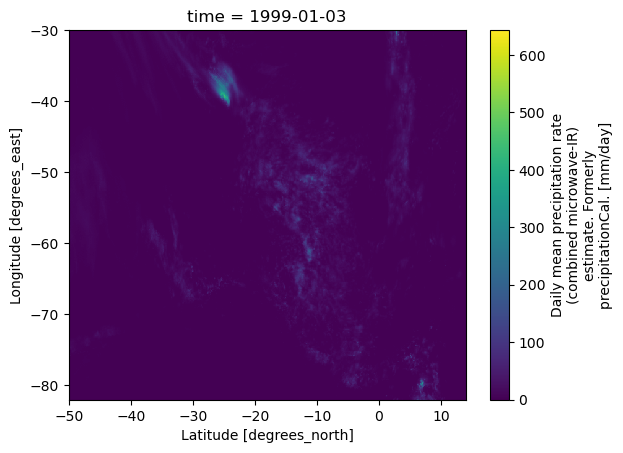

In [13]:
data.precipitation[0,:,:].plot()